In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Data Analyses on Titanic Dataset

## Dataset Source and Description

Titanic dataset includes data about which passengers survived the Titanic shipwreck

Source: https://www.kaggle.com/competitions/titanic/data


### Dataset Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp: The dataset defines family relations in this way:

	Sibling = brother, sister, stepbrother, stepsister
	Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way:

	Parent = mother, father
	Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



## Data Analyses Goal

We'll analyse the dataset in order to be able to answer next questions:

1. Did the sex of the passengers affect the chances of surviving?

2. Did Age effect the chances of surviving?

3. Did the Port of Embarkation affect the chances of surviving?



## Data Acquisition

In [2]:
#Load the CSV into a Pandas Dataframe
titanic_data = pd.read_csv('./train.csv')

In [3]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data Cleaning

### Get initial data insight

In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note, that **there are missing values at the Age, Cabin and Embarked columns**.

### Sum up the total missing values

In [6]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since most of Cabin column values are missing we will omit this column along with the Ticket, PassengerId and Name columns that we will not use for this initial investigation. 

We will make a new Dataframe in case we want to access the initial one again.

In [7]:
#Drop the unneeded columns
titanic_data_clean=titanic_data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [8]:
titanic_data_clean.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


### Deal with missing values

#### Deal with Age NaNs

We have 177 missing Age values, so we can not afford to delete so many rows. We must find a proper value to replace with.

Let's get some insight about Age values

In [9]:
titanic_data_clean.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We will replace missing Age values with its median

In [10]:
age_median = titanic_data_clean['Age'].median()

titanic_data_clean['Age'] = titanic_data_clean['Age'].fillna(age_median)

#### Deal with missing values for Embarked 

In [11]:
titanic_data_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

We have only 2 missing values in Embarked column, so we can just delete these 2 rows

In [12]:
# drop all rows with NaNs for embarked
titanic_data_clean.dropna(axis=0, inplace=True)

In [13]:
titanic_data_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Checking for outliers 

Let's create boxplots for continuous data fields and checking to see which values lie outside the 'minimum' and 'maximum' ranges.

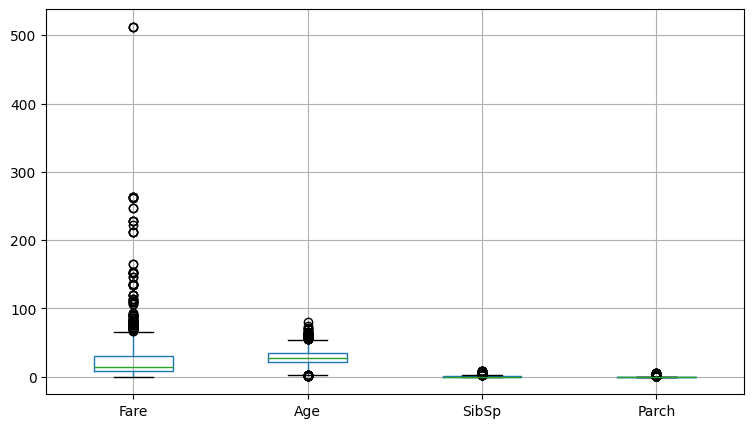

In [14]:
titanic_data_clean.boxplot(column=['Fare', 'Age', 'SibSp', 'Parch'], figsize=(9,5))
plt.show()

In the 'Fare' feature there are some outliers well in excess of 500. As this is only a small group of outliers, removing them is unlikely to change the outcome of the data analysis. Therefore, we can trim the dataset to exclude these points.

In [15]:
# get rows for which 'fare'>=500
outliears = titanic_data_clean[titanic_data_clean['Fare']>=500]
outliears

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [16]:
# now, drop that rows
titanic_data_clean.drop(outliears.index, inplace=True)
titanic_data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
